In [1]:
import io
import os
import json
import time
import string
import pandas as pd
import numpy as np
from scipy import stats
from datetime import datetime
from collections import Counter
from tqdm import tqdm_notebook
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()
import warnings
warnings.filterwarnings('ignore')
directory = "../Data/News/"
pd.set_option('display.max_colwidth', -1)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
blue, red, elm ='#336699', '#9A3334', '#217C7E'
%matplotlib inline
mydpi=600

__author__ = 'HK Dambanemuya'
__version__ = 'Python2'

In [2]:
def clean_domain(domain): return domain.replace('www.','').split('.')[0]
ref = pd.read_csv("../Data/References/top500")
ref['domain'] = ref['domain'].apply(clean_domain)
ref.head()

,domain,avg_align,l2,l1,n,r1,r2
0,readersupportednews,-0.998,0.822,0.175,0.003,0.000,0.000
1,act,-0.971,0.152,0.848,0.000,0.000,0.000
2,commondreams,-0.967,0.894,0.095,0.011,0.000,0.000
3,thenewcivilrightsmovement,-0.964,0.987,0.007,0.006,0.000,0.000
4,jezebel,-0.949,0.950,0.047,0.003,0.000,0.000


In [3]:
data = []
for file in os.listdir(directory):
    if file != '.DS_Store':
        for line in open(directory+file, 'r'):
            data.append(json.loads(line))
len(data)

2711460

In [4]:
def get_sentiment(text):
    score = analyser.polarity_scores(text.encode('utf-8'))
    return score.get('compound')

In [5]:
dates = [datetime.strptime(item.get('published')[0:23],"%Y-%m-%dT%H:%M:%S.%f") for item in tqdm_notebook(data)]

In [6]:
titles = [item.get('title') for item in tqdm_notebook(data)]

In [7]:
participants = [item.get('thread').get('participants_count') for item in tqdm_notebook(data)]

In [8]:
replies = [item.get('thread').get('replies_count') for item in tqdm_notebook(data)]

In [9]:
text = [item.get('text') for item in tqdm_notebook(data)]

In [10]:
length = [len(doc.split()) for doc in tqdm_notebook(text)]

In [11]:
sites = [site.get('thread').get('site').split(".")[0] for site in tqdm_notebook(data)]

In [12]:
countries = [item.get('thread').get('country') for item in tqdm_notebook(data)]

In [13]:
align = [float(ref[ref['domain']==site]['avg_align'].values.mean()) if (site in ref['domain'].values) else '-9999' for site in tqdm_notebook(sites)]

In [14]:
sentiment = [get_sentiment(item) for item in tqdm_notebook(text)]

In [15]:
df = pd.DataFrame()
df['date'] = dates
df['title'] = titles
df['text'] = text
df['participants'] = participants
df['replies'] = replies
df['length'] = length
df['source'] = sites
df['country'] = countries
df['align'] = align
df['sentiment'] = sentiment
df.to_csv("../Data/Fusion/news.csv", encoding='UTF-8', index=False)
df[['date', 'sentiment']].to_csv("../Data/Fusion/news_sentiment.csv", encoding='UTF-8', index=False)
df[df['length']>70][['date', 'sentiment']].to_csv("../Data/Fusion/news_sentiment_70.csv", encoding='UTF-8', index=False)
df[df['length']>100][['date', 'sentiment']].to_csv("../Data/Fusion/news_sentiment_100.csv", encoding='UTF-8', index=False)
df[df['length']>130][['date', 'sentiment']].to_csv("../Data/Fusion/news_sentiment_130.csv", encoding='UTF-8', index=False)

In [16]:
df.head(1)

,date,title,text,participants,replies,length,source,country,align,sentiment
0,2020-02-15 14:31:00,France confirms first European virus death,"France confirms first European virus death Reuters February 15, 2020 10:31pm\nAn elderly Chinese tourist hospitalised in France has died of the coronavirus, becoming the first fatality in Europe.\nFrance has recorded 11 cases of the virus, out of a global total of 67,000.\nThe vast majority of those suffering from the virus are in China. The epidemic has killed more than 1500 people.\nFrench Health Minister Agnes Buzyn said she was informed on Friday that the 80-year old man, who had been treated at the Bichat hospital in northern Paris since January 25, died of a lung infection due to the coronavirus.\n""This is the first fatality by the coronavirus outside Asia, the first death in Europe,"" Buzyn told reporters on Saturday.\n""We have to get our health system ready to face a possible pandemic propagation of the virus, and therefore the spreading of the virus across France.""\nBuzyn said the Chinese man, originally from Hubei province, arrived in France on January 16.\nHis condition quickly deteriorated and he had been in a critical condition for several days.\nHis daughter, who is also hospitalised in Paris, was no longer a source of concern for health authorities and could be released soon, the minister said.\nOut of 11 cases in France, four patients were successfully treated and have checked out of hospital.\n""Six patients remain hospitalised but are no longer a source of concern today,"" Buzyn said.\nOutside mainland China, there have been about 500 cases in some 24 countries and territories.\nUntil the death in France, there had been three deaths outside China, with one in Japan, one in Hong Kong and one in the Philippines.",1,0,277,news,AU,-0.041,-0.976


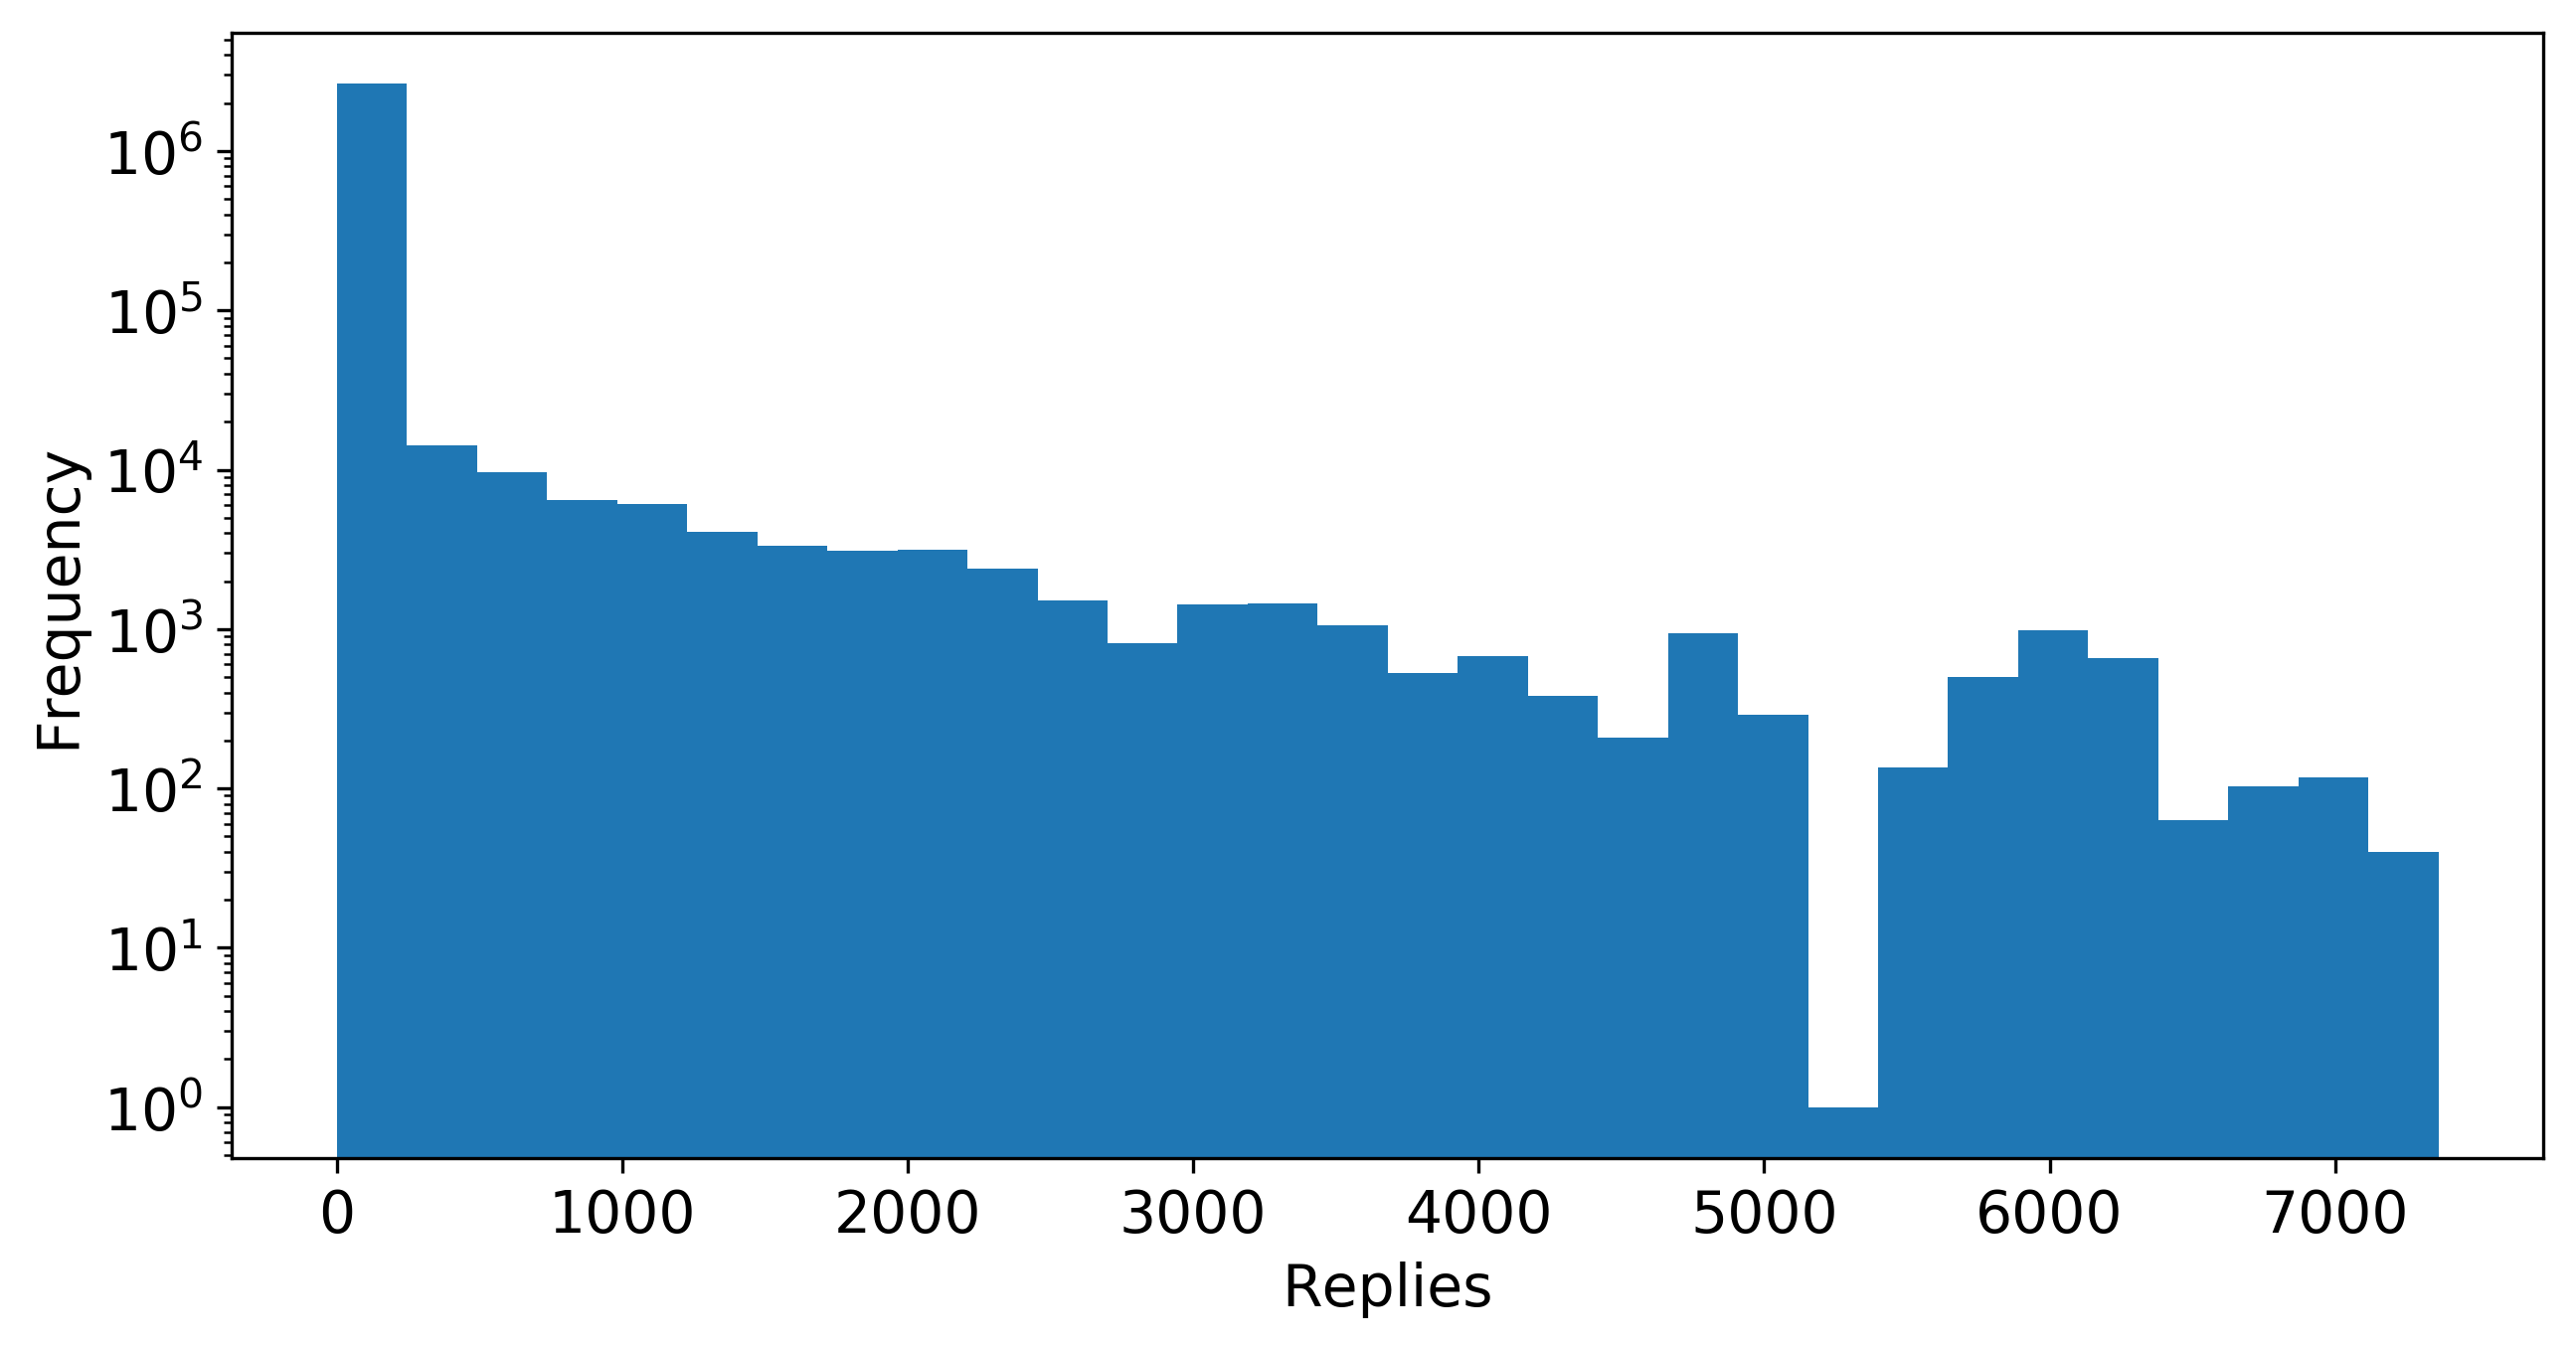

In [17]:
fig = plt.figure(figsize=(10,5), dpi=300)
ax = df['replies'].plot(kind='hist', bins=30, ax = plt.gca())
plt.yscale('log')
plt.xlabel("Replies", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

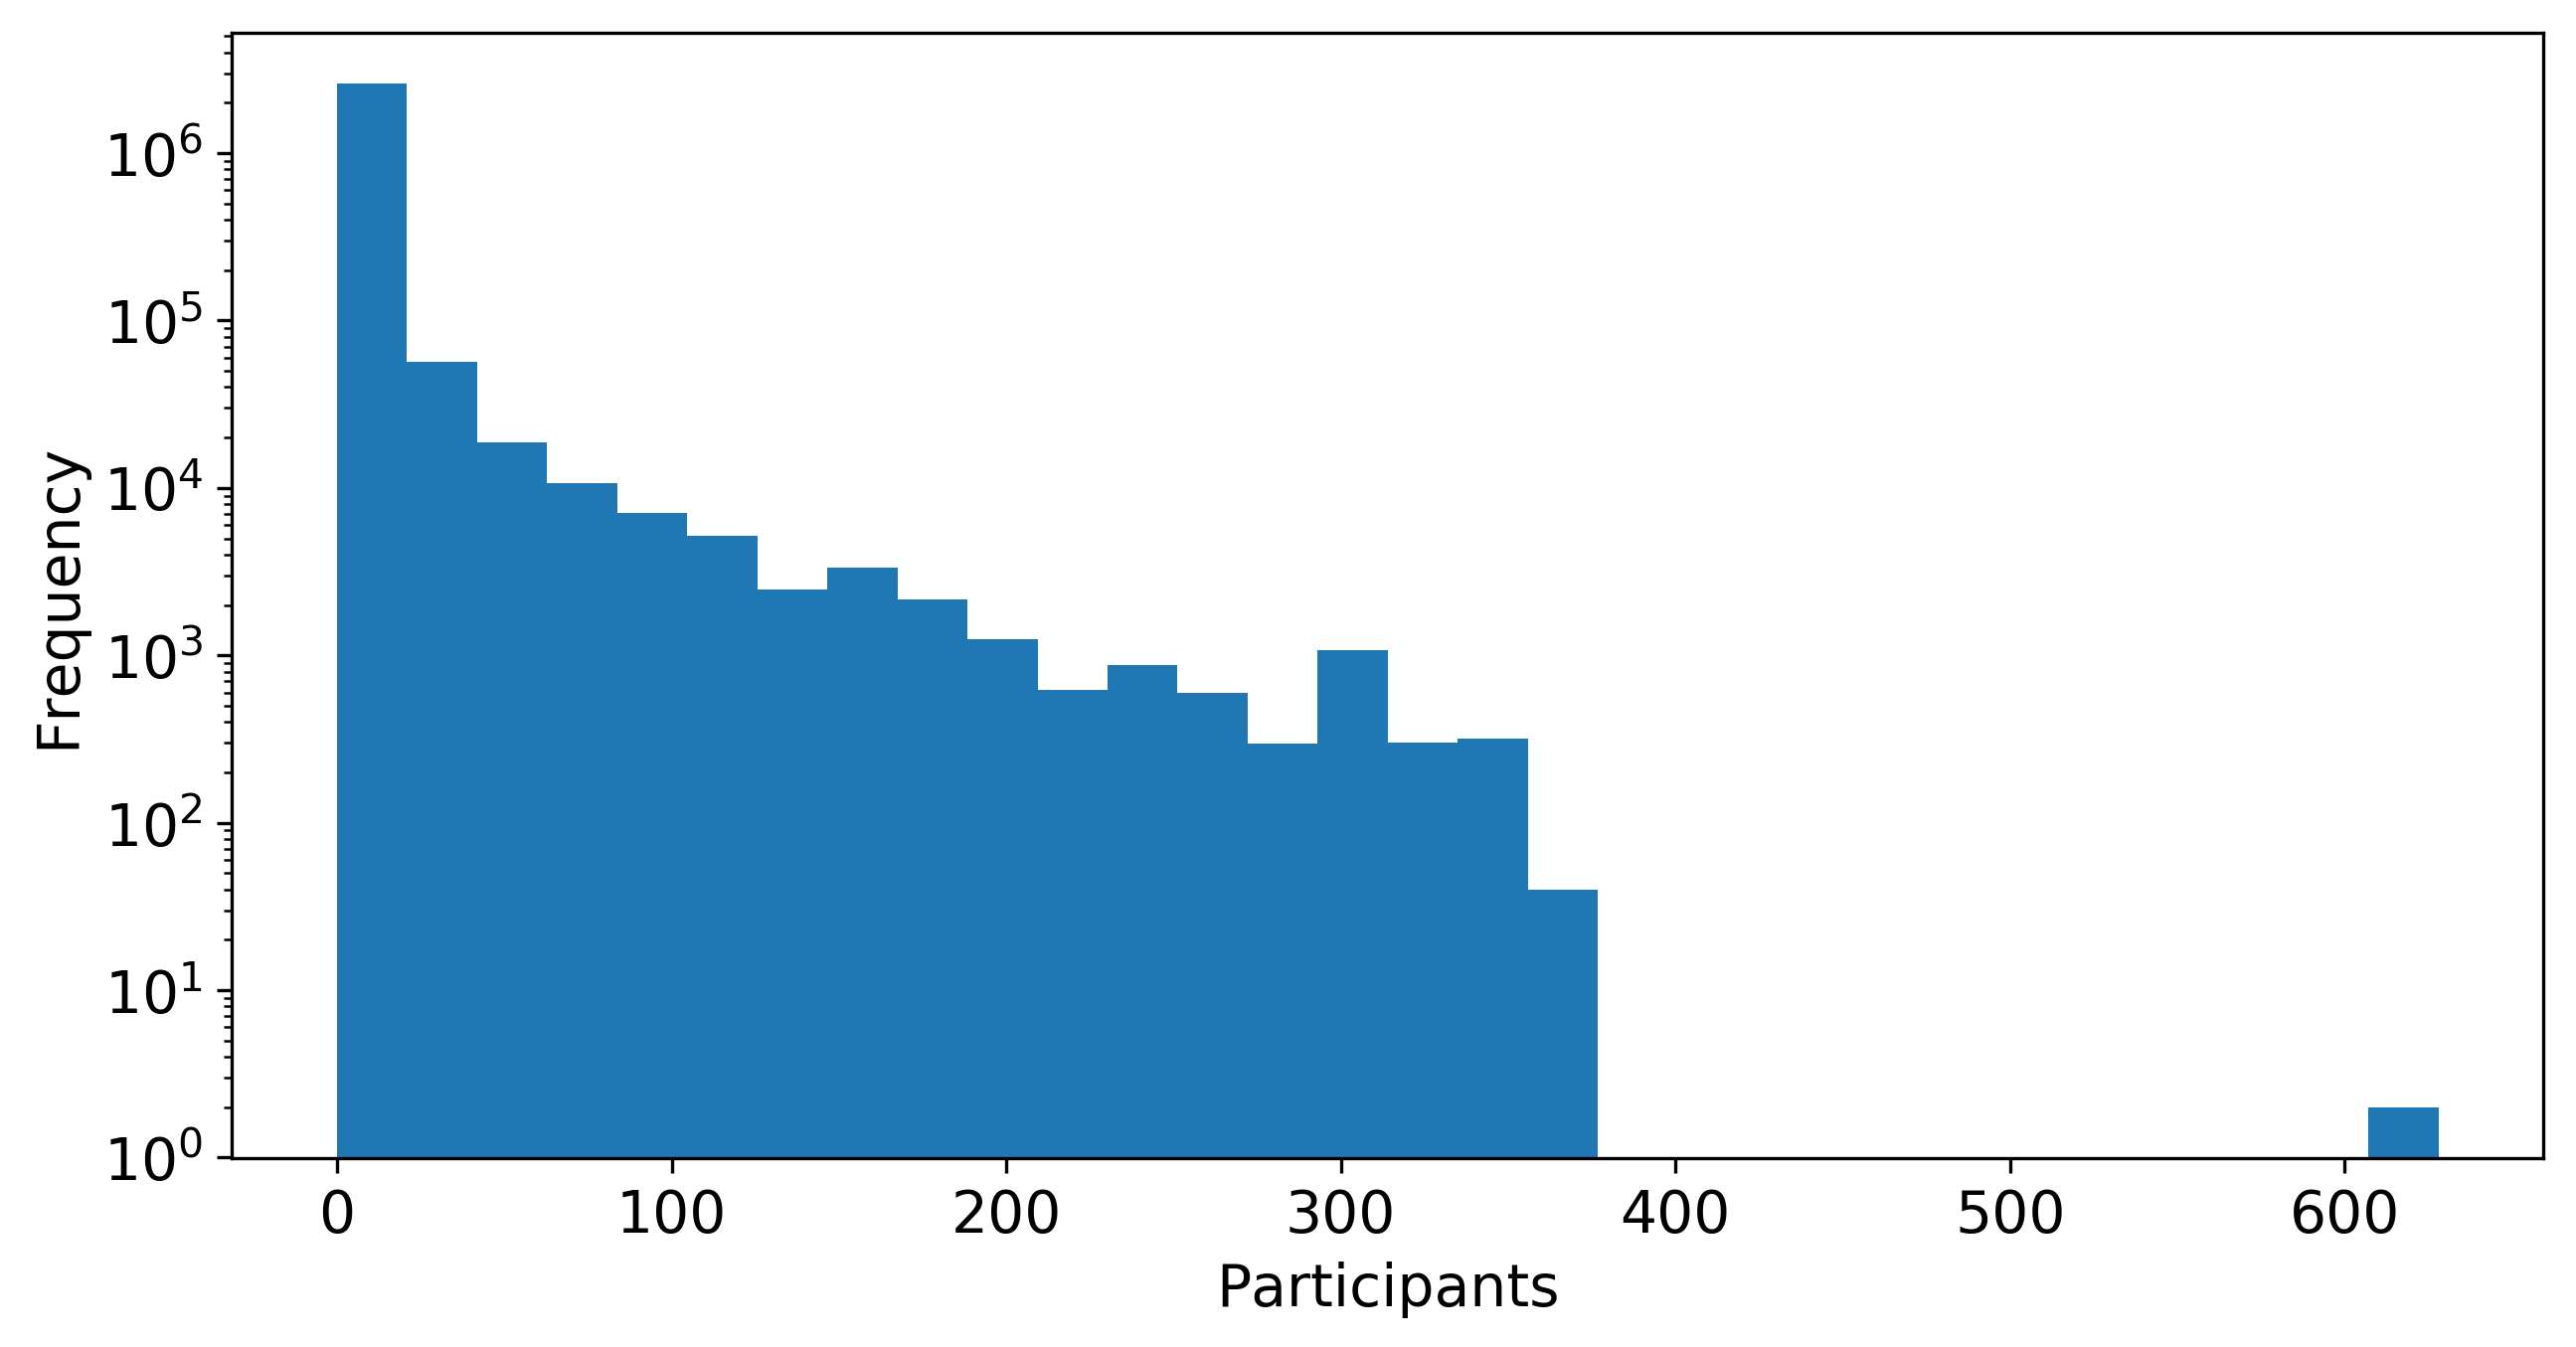

In [18]:
fig = plt.figure(figsize=(10,5), dpi=300)
ax = df['participants'].plot(kind='hist', bins=30, ax = plt.gca())
plt.yscale('log')
plt.xlabel("Participants", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

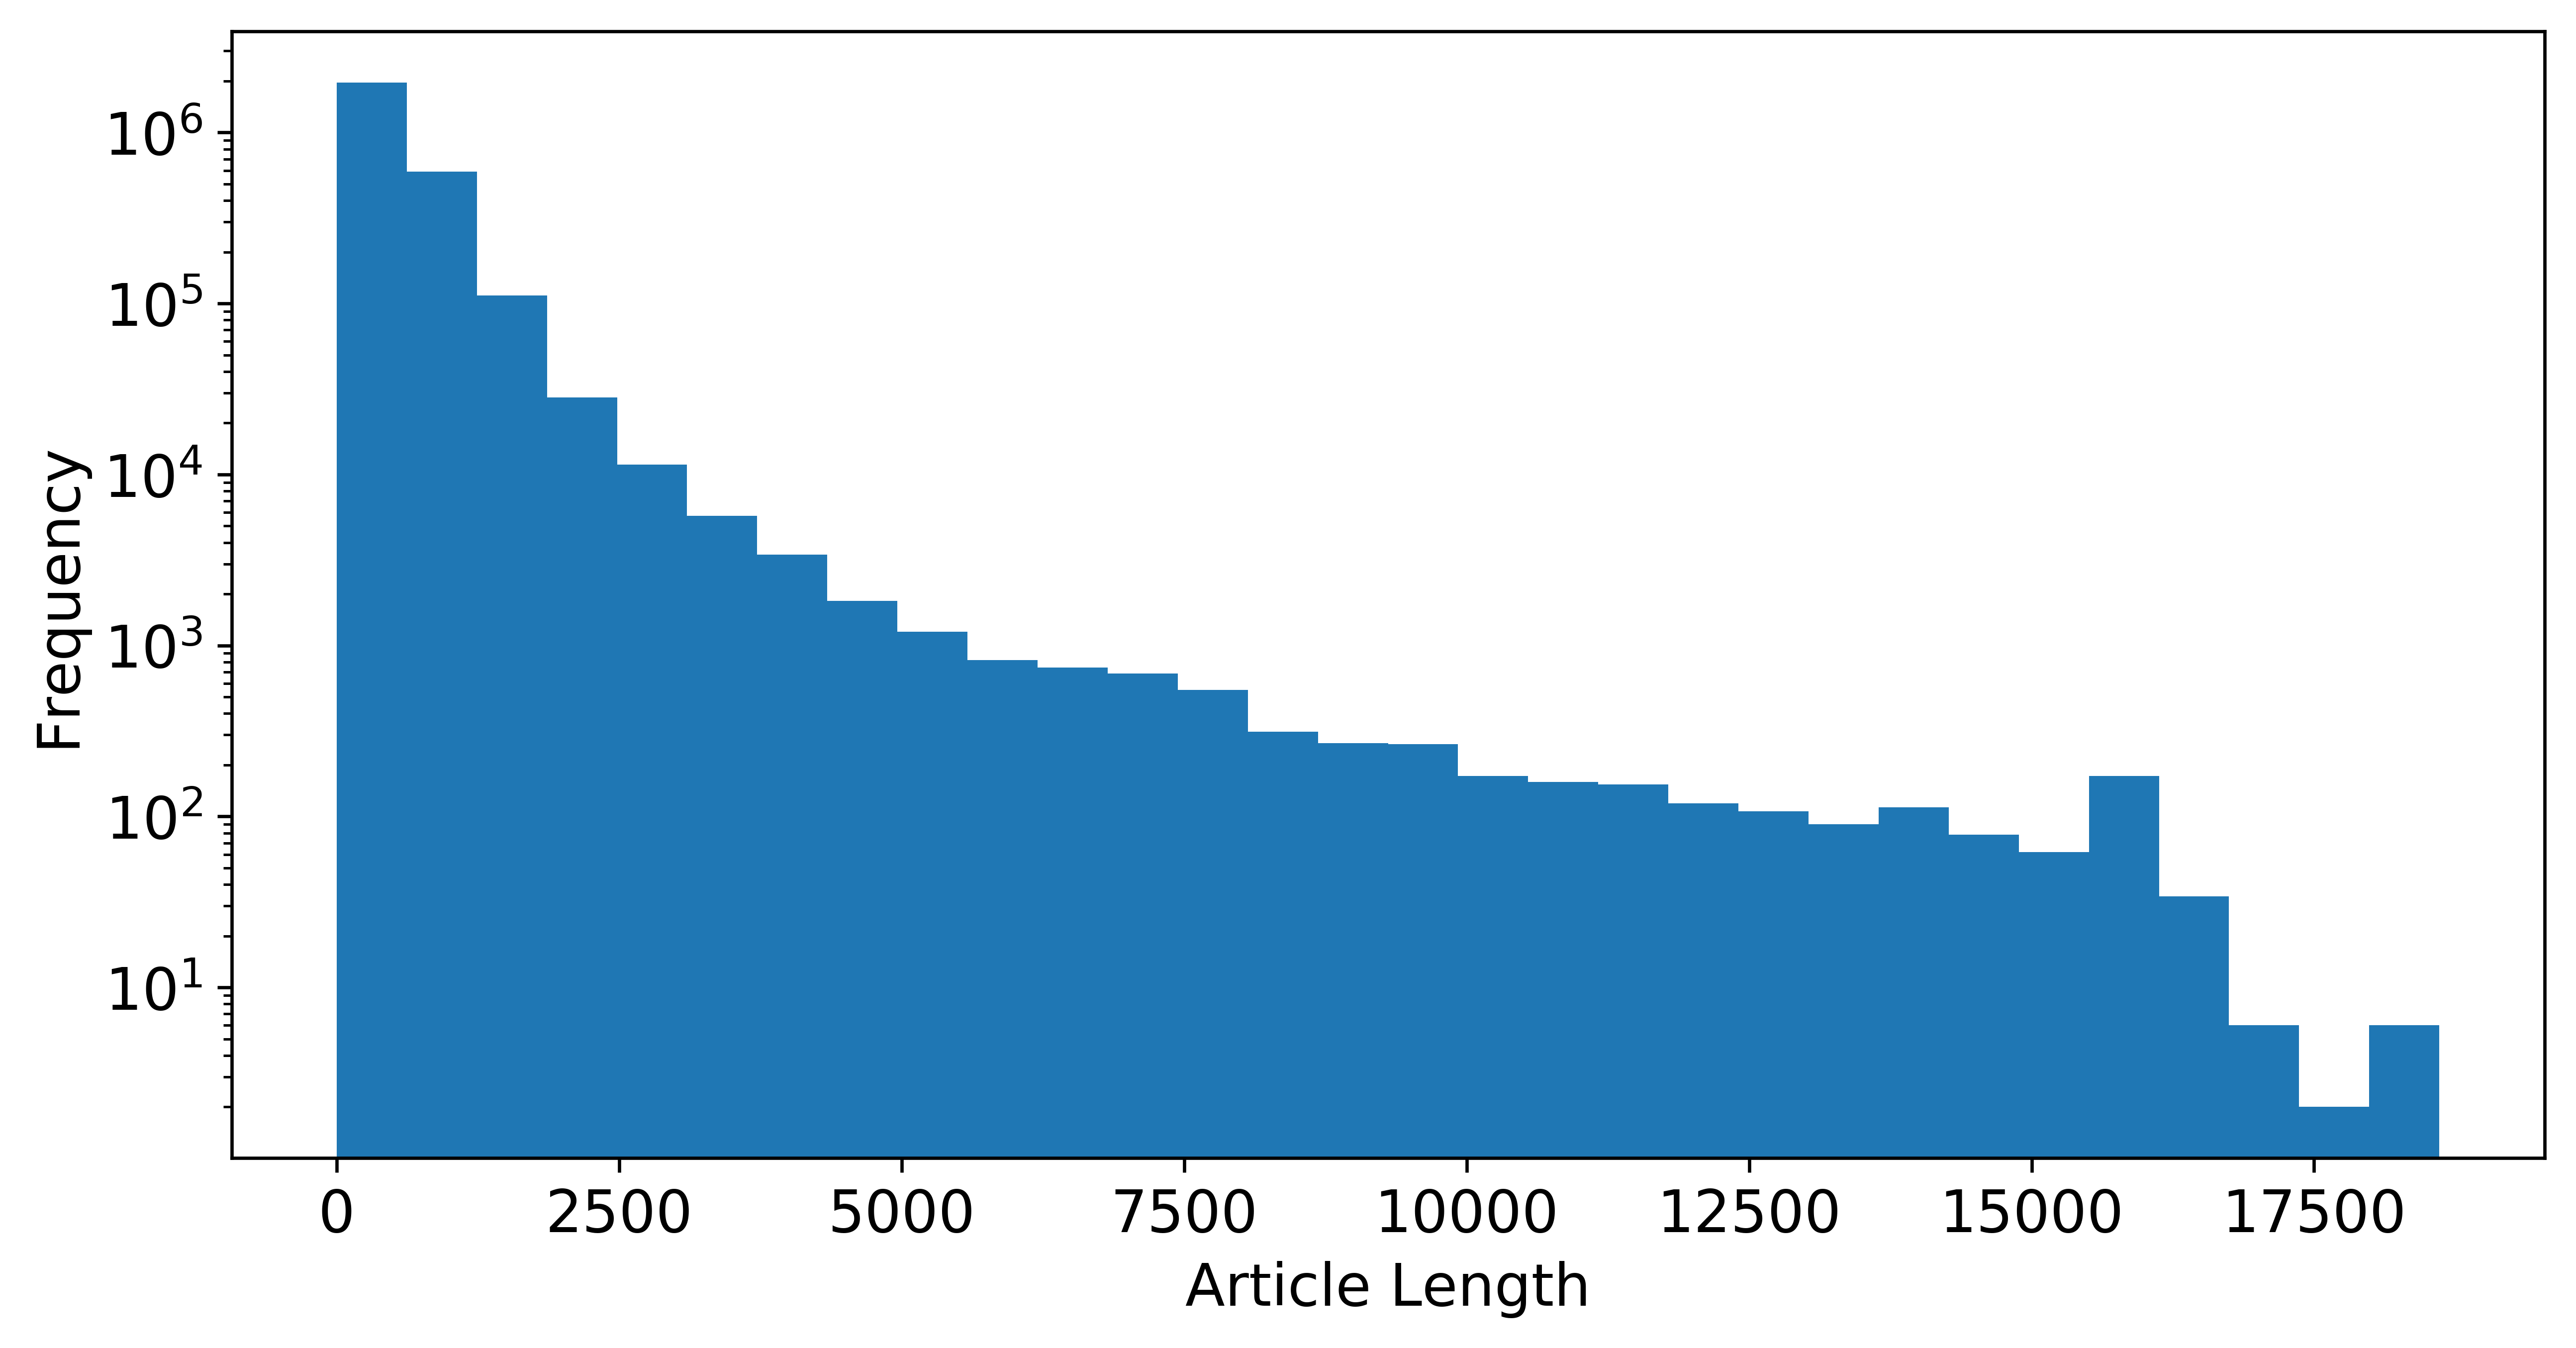

In [19]:
fig = plt.figure(figsize=(10,5), dpi=mydpi)
ax = df['length'].plot(kind='hist', bins=30, ax = plt.gca())
plt.yscale('log')
plt.xlabel("Article Length", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

In [20]:
var_dates = [datetime.strftime(date, '%Y-%m-%d') for date in dates]
dic_dates = Counter(var_dates)
with open('../Data/Fusion/news_dates.json', 'w') as f:
    json.dump(dict(dic_dates), f)

In [21]:
k, v = [], []
for key in sorted(dic_dates.keys()):
    k.append(key)
    v.append(dic_dates.get(key))

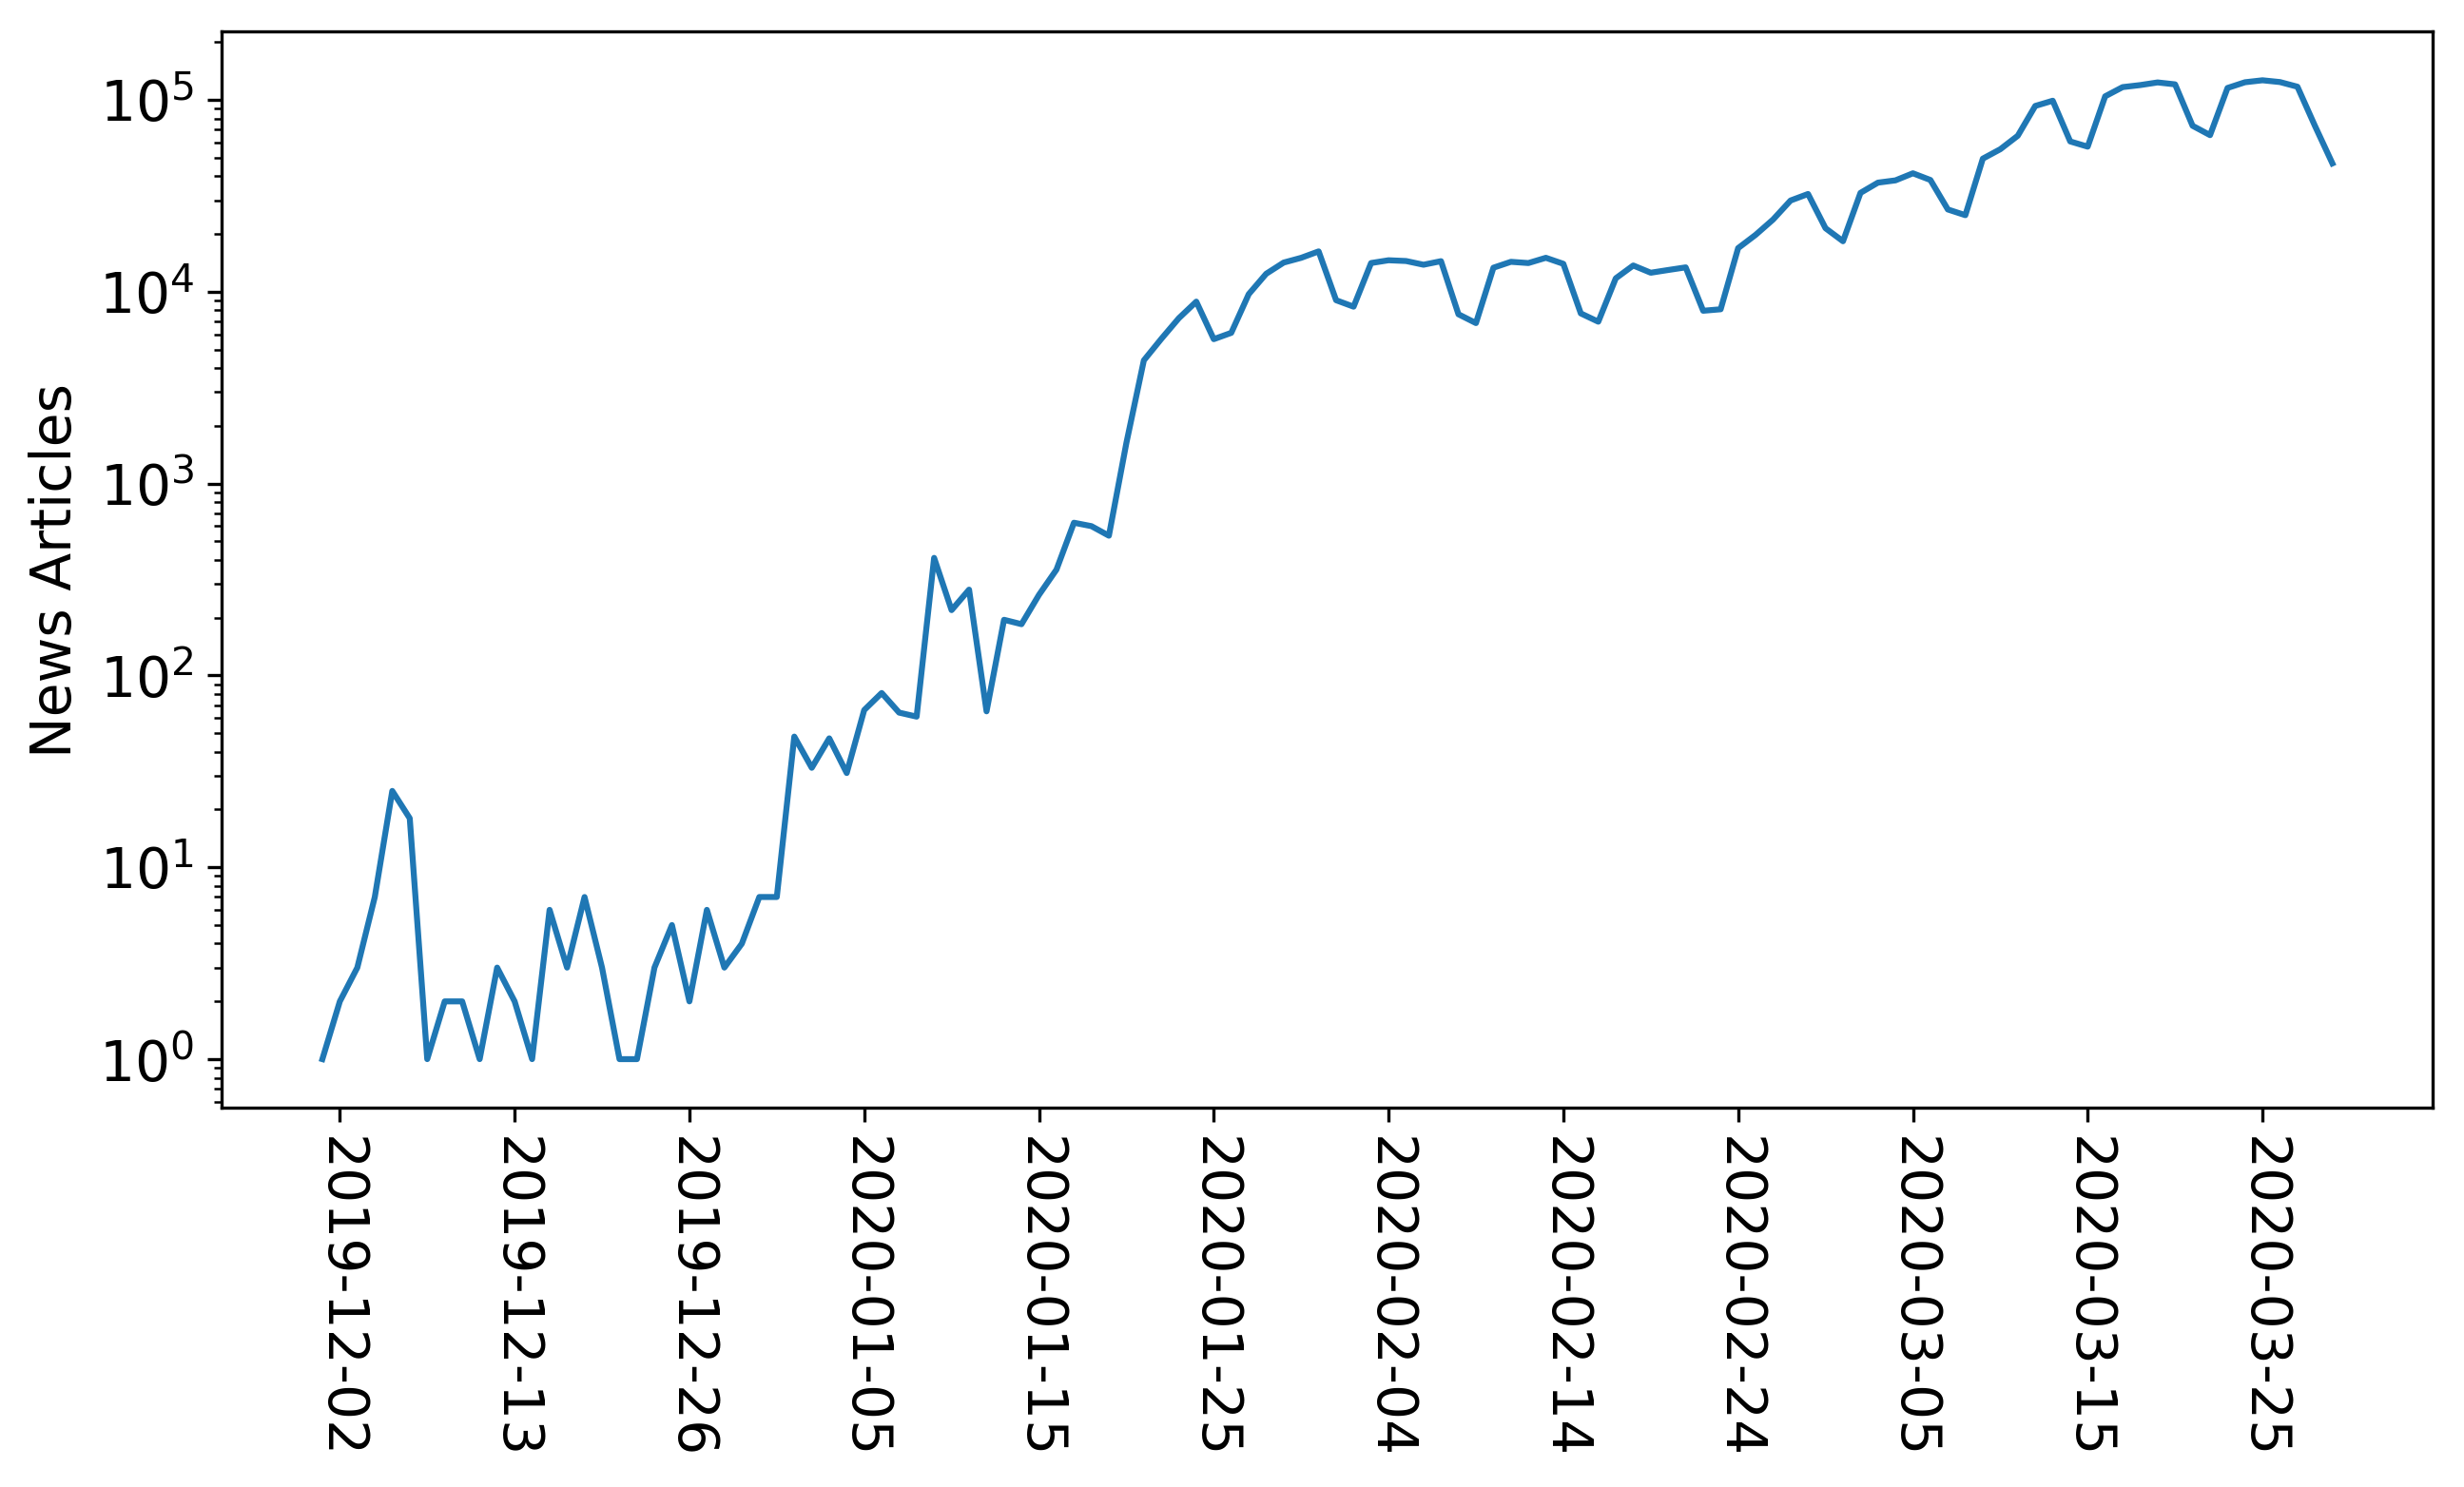

In [22]:
fig = plt.figure(figsize=(10,5), dpi=300)
plt.plot(k[:-1],v[:-1], label='News')
plt.xticks(np.arange(1, len(k), 10), rotation=270)
plt.yscale('log')
plt.ylabel("News Articles", fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
# plt.legend()
plt.show()

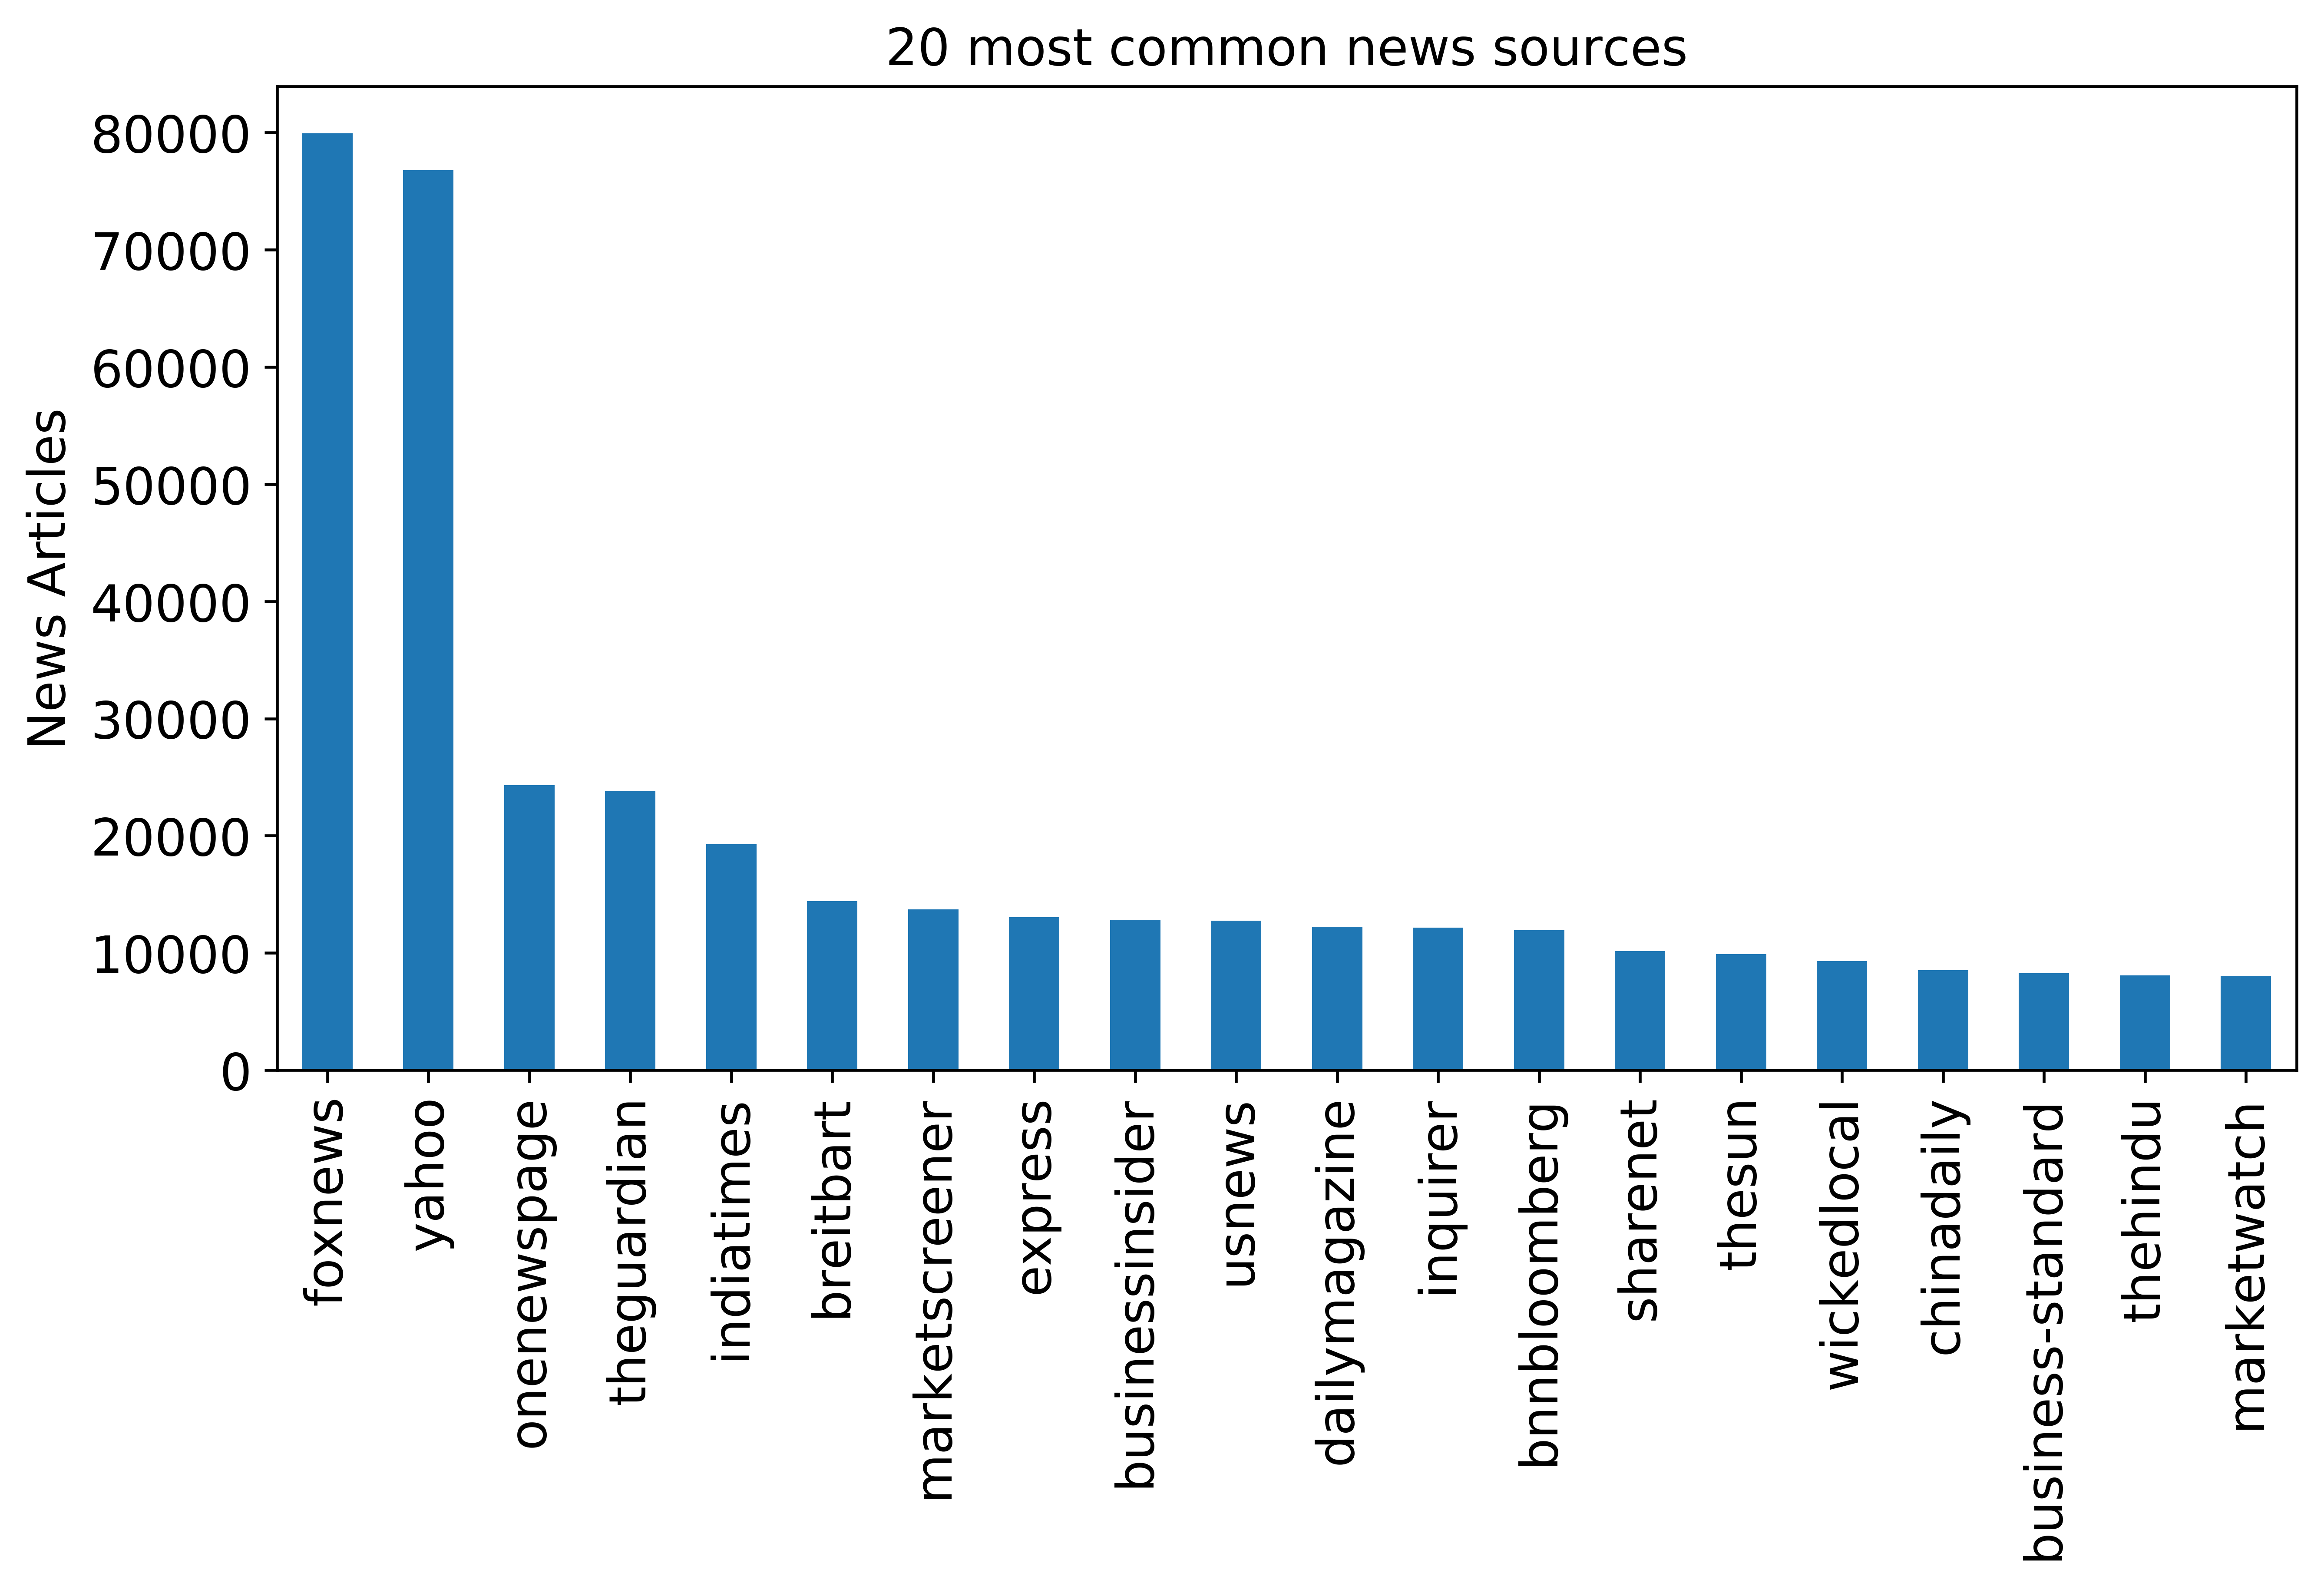

In [23]:
plt.figure(figsize=(10,5), dpi=mydpi)
df['source'].value_counts()[:20].plot(kind='bar')
plt.ylabel("News Articles", fontsize=14)
plt.title("20 most common news sources", fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

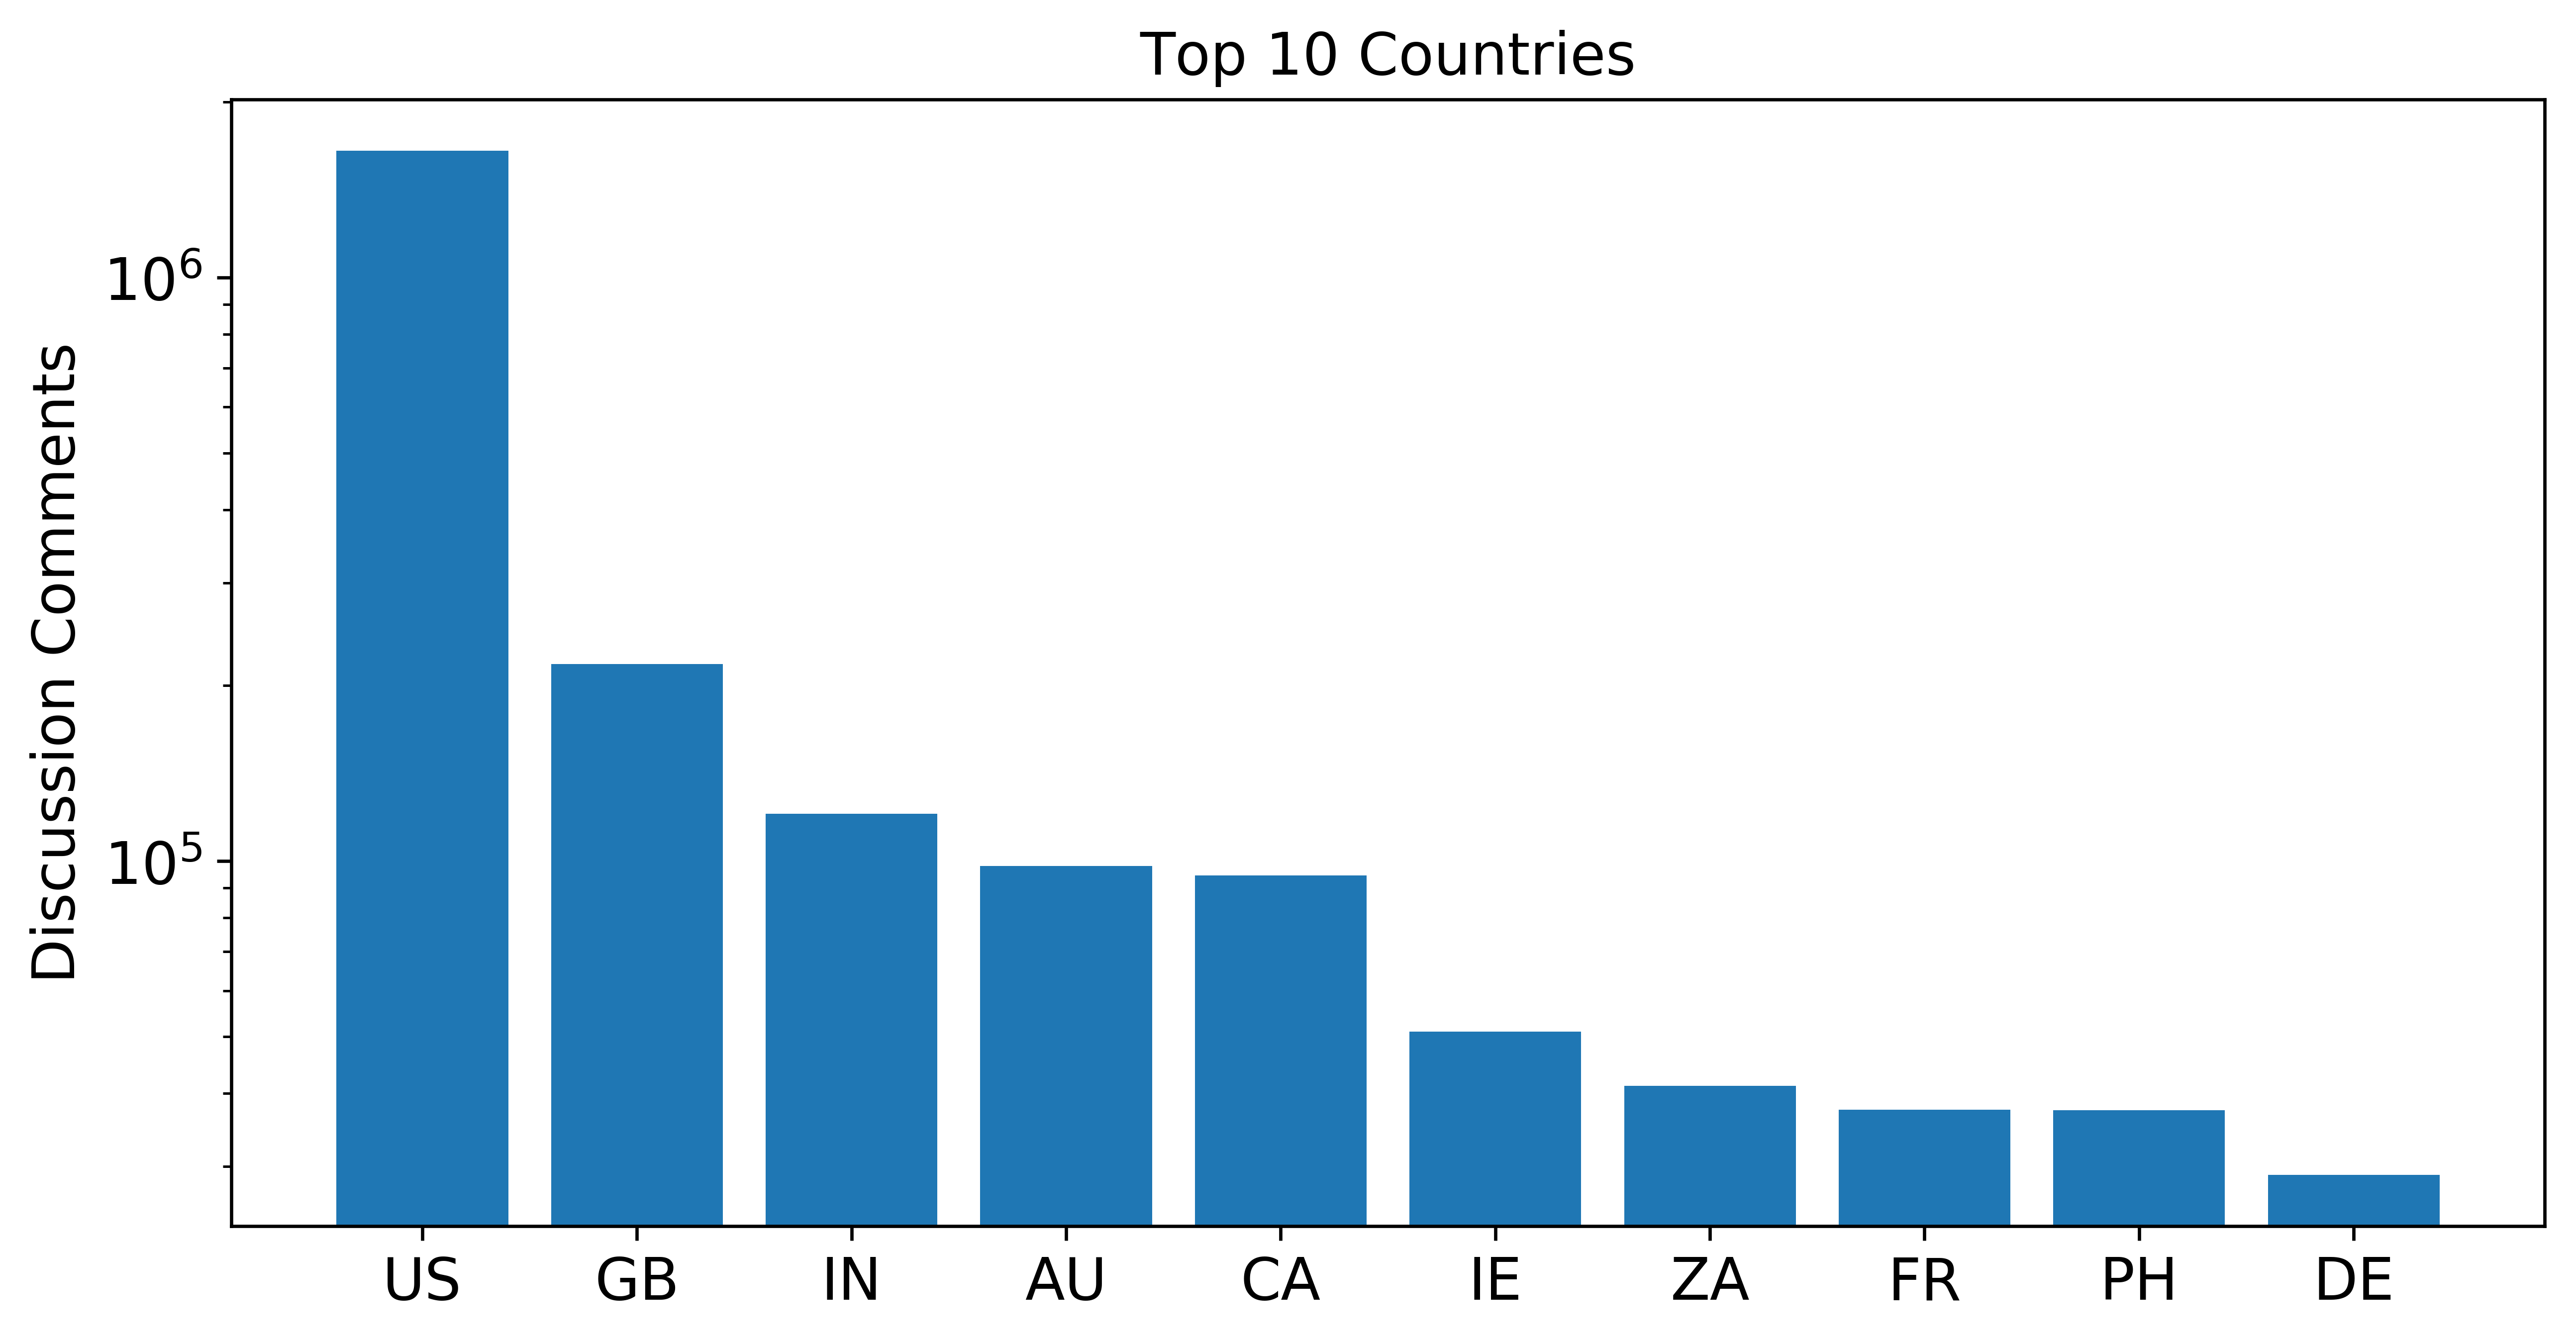

In [25]:
plt.figure(figsize=(10,5), dpi=mydpi)
plt.bar([i[0] for i in Counter(df['country']).most_common(10) if i[0] != ''], 
       [i[1] for i in Counter(df['country']).most_common(10) if i[0] != ''])
plt.ylabel("Discussion Comments", fontsize=14)
plt.title("Top 10 Countries", fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.yscale('log')
plt.show()

In [26]:
Counter(df['country']).most_common(10)

[(u'US', 1651194),
 (u'GB', 217729),
 (u'IN', 120519),
 (u'AU', 98142),
 (u'CA', 94446),
 (u'IE', 51002),
 (u'ZA', 41194),
 (u'FR', 37498),
 (u'PH', 37425),
 (u'DE', 29014)]